<h1>Energy Consumption</h1>

<h2>Notes</h2>

In [1]:
#Population is the number you see in the row multiplies by 1000

#Energy intensity—calculated as total energy consumption divided by real 
#gross domestic product (GDP)—is a common energy indicator and 
#efficiency measure. Measured in BTU's

#Electric power consumption per capita (kWh ) is the production of power 
#plants and combined heat and power plants less transmission, 
#distribution, and transformation losses and own use by heat and 
#power plants, divided by midyear population. Measured in kWh

#Energy production refers to how much primary energy a country extracts 
#from nature. This is the total of all of the harvested primary fuels 
#and primary energy flows. Note production ignores both imports and exports,
#and sums up what's extracted from nature.

In [2]:
# Country - USA
# Energy_type - Type of energy source
# Year - Year the data was recorded
# Energy_consumption - Amount of Consumption for the specific energy source, measured (quad Btu)
# Energy_production - Amount of Production for the specific energy source, measured (quad Btu)
# GDP - Countries GDP at purchasing power parities, measured (Billion 2015$ PPP)
# Population - Population of specific Country, measured (Mperson)
# Energyintensityper_capita - Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of capita (capita = individual person), measured (MMBtu/person)
# Energyintensityby_GDP- Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of GDP, measred (1000 Btu/2015$ GDP PPP)
# CO2_emission - The amount of C02 emitted, measured (MMtonnes CO2)

In [3]:
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

In [4]:
from pandas.plotting import scatter_matrix, lag_plot
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
pd.options.mode.chained_assignment = None

dataset = pd.read_csv('energy.csv')

In [6]:
usa_df = dataset[dataset.Country == 'United States']

<h1>Correlation Matrix</h1>

In [7]:
# Looking at the Energy_consumption column we can see that the CO2_emission is the one that
# affects it the most

In [8]:
corr_matrix = usa_df.corr(numeric_only = True) 

In [9]:
corr_matrix['Energy_consumption'].sort_values(ascending = False)

Energy_consumption             1.000000
CO2_emission                   0.974379
Energy_production              0.963989
GDP                            0.094832
Population                     0.094400
Year                           0.093658
Unnamed: 0                     0.093579
Energy_intensity_per_capita   -0.010170
Energy_intensity_by_GDP       -0.094382
Name: Energy_consumption, dtype: float64

array([[<AxesSubplot:xlabel='Energy_consumption', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='Population', ylabel='Energy_consumption'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='Population', ylabel='CO2_emission'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='Population', ylabel='Energy_production'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='Population'>,
        <AxesSubplot:xlabel='CO2_emiss

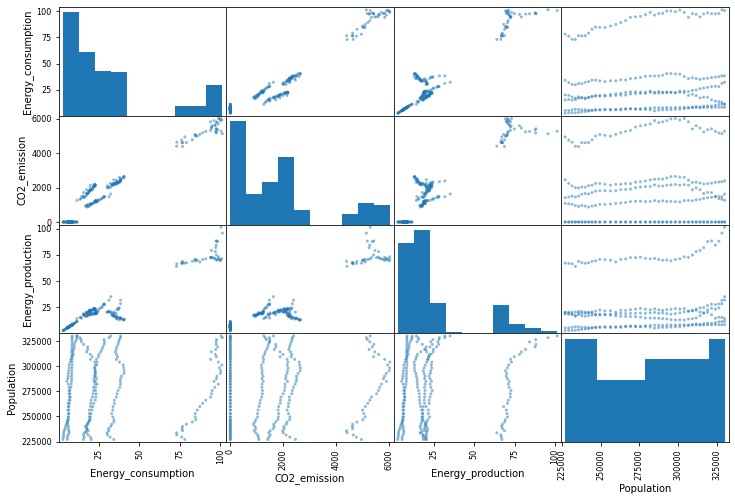

In [10]:
cols = ['Energy_consumption','CO2_emission', 'Energy_production', 'Population']
scatter_matrix(usa_df[cols], figsize=(12, 8))

In [11]:
# When creating a scatter plot for the Energy Types, it shows that
# petroleum is the number 1 non-renewable resource that is used
# the most, Natural gas is second and it looks like it is on the rise
# for consumption. Coal is the third most non-renewable resource used and it looks like it is on a down
# turn

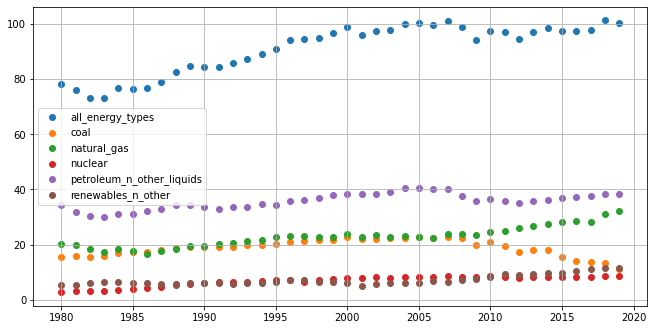

In [12]:
f, axes = plt.subplots(1,1, figsize = (11,5.5))

for a,(b,c) in enumerate(usa_df.groupby('Energy_type')):
    axes.scatter(c.Year, c.Energy_consumption, label = b)
    
axes.legend()
axes.grid(True)
plt.show()

<h1>Pie Charts</h1>

<h2>1980-2019 Consumption </h2>

In [13]:
# The first pie chart represents what percent of energy type has been used the most from 1980 to 2019.
# In this order, Oil is the most consumed, followed by Natural gas, then in third we have coal.

In [14]:
total_energy_consumption = usa_df.copy()
pie_chart_tec = total_energy_consumption.groupby('Energy_type').agg({'Energy_consumption': 'sum'}).reset_index()
pie_chart_tec.drop(pie_chart_tec[(pie_chart_tec['Energy_type'] == 'all_energy_types')].index, inplace = True)

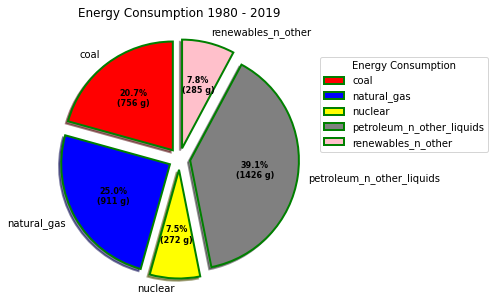

In [15]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(pie_chart_tec.Energy_consumption,
                                  autopct = lambda pct: func(pct, pie_chart_tec.Energy_consumption),
                                  labels = pie_chart_tec.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, pie_chart_tec.Energy_type,
          title ="Energy Consumption",
          loc ="center left",
          bbox_to_anchor =(1, .2, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title("Energy Consumption 1980 - 2019")
 
# show plot
plt.show()

<h2>2015-2019 Consumption</h2>

In [16]:
# The second pie chart represents what percent of energy type has been used the most from 2015 to 2019.
# In this order, Oil is the most consumed, followed by Natural gas, then in third we have coal.In the
# last 5 years of the dataset it looks like there is a rise in renewable energy.Reneweable resources
# are about 3% away from Coal.

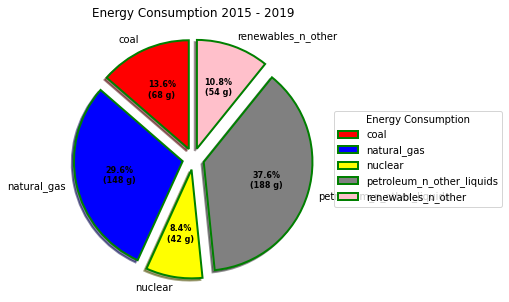

In [17]:
last5yrs = usa_df.tail(30)

last5yrs= last5yrs.groupby('Energy_type').agg({'Energy_consumption': 'sum'}).reset_index()

last5yrs

last5yrs.drop(last5yrs[(last5yrs['Energy_type'] == 'all_energy_types')].index, inplace = True)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(last5yrs.Energy_consumption,
                                  autopct = lambda pct: func(pct, last5yrs.Energy_consumption),
                                  labels = last5yrs.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, last5yrs.Energy_type,
          title ="Energy Consumption",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title("Energy Consumption 2015 - 2019")
 
# show plot
plt.show()

<h1>All Energy Types</h1>

<h2>CO2_Emissions</h2>

In [18]:
# The all_energy_types in the dataset allows us to see the total CO2_emissions from all the 
# energy types (coal, oil, natural gas, nuclear, renweables_n_others) as well as the totals
# from all the other columns for a specific year

In [19]:
usa_df[usa_df.Year == 2000][['Energy_type','Year','CO2_emission']]

#The all_energy_types gives us the sum of all the carbon emission of the Energy_types.
# BELOW IS AN EXAMPLE, IF YOU SUM ALL THE ENERGY TYPES YOU GET THE VALUE OF ALL_ENERGY_TYPES

,Energy_type,Year,CO2_emission
29040,all_energy_types,2000,5700.252865
29041,coal,2000,2061.622698
29042,natural_gas,2000,1196.935249
29043,petroleum_n_other_liquids,2000,2441.694918
29044,nuclear,2000,0.000000
29045,renewables_n_other,2000,0.000000


In [20]:
# When creating probability density functions using the the Kernel Desntiy Estimator,
# we can see that petroleum_n_other_liquids are the ones that produce the most
# CO2 emissions in the USA.

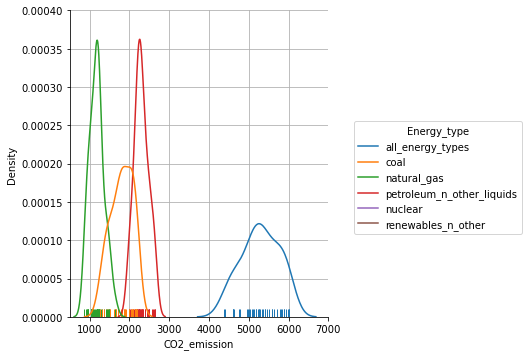

In [21]:
# Please Note: While kernel density estimation produces a probability distribution, 
# the height of the curve at each point gives a density, not a probability.

# For Nuclear and renewables_n_other, they are on the plot however you cannot see them
# due to the face that they do not release any CO2
a = sns.displot(data = usa_df,
            x = "CO2_emission",
            hue = "Energy_type",
            kind = "kde",
            rug = True
) 

sns.move_legend(obj = a,loc = 'center right', frameon = True)
plt.grid(True)
plt.ylim(0, .0004)
plt.xlim(500,7000)

plt.show()

In [22]:
all_energy_df = usa_df[usa_df.Energy_type == 'all_energy_types']
all_energy_df.fillna(0, axis = 0, inplace = True)

In [23]:
all_energy_df[ 'Change' ] = all_energy_df.Energy_consumption.rolling(2).mean()
all_energy_df['Change_CO2'] = all_energy_df.CO2_emission.rolling(2).mean()

In [24]:
x_all = np.array(all_energy_df.Population).reshape((-1,1))
y_all = np.array(all_energy_df.CO2_emission)

In [25]:
lr_model_all = LinearRegression().fit(x_all,y_all)

In [26]:
y_pred_all = lr_model_all.predict(x_all)

In [27]:
X2_all = sm.add_constant(x_all)
est_all = sm.OLS(y_all, X2_all)
est2_all = est_all.fit()
print(est2_all.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     28.51
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           4.58e-06
Time:                        20:42:48   Log-Likelihood:                -290.90
No. Observations:                  40   AIC:                             585.8
Df Residuals:                      38   BIC:                             589.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2674.4506    493.151      5.423      0.0

In [28]:
# PLease note that coefficient of determination in the cell above and below are at 43%. Meaning that only
# 43% of the variance is accounted for. There are a lot of points in the regression model that are far from the
# line of regression.

In [29]:
r_squared_all = lr_model_all.score(x_all,y_all)
print(f'Coeficient of Determination(R-Squared): {r_squared_all}',
      '\nY-Intercept:',lr_model_all.intercept_,
     '\nSlope:',lr_model_all.coef_)

Coeficient of Determination(R-Squared): 0.428625635655953 
Y-Intercept: 2674.4505764413975 
Slope: [0.00937716]


In [30]:
# Using all Energy Types we can see that from 1980 to 2019. USA does have an increase of
# CO2 emissions released into the Atmosphere as population continues to increase.However, there
# was a small portion in time were the CO2 emissions appeared to be falling at a steady pace. Which
# was at about 2008 to 2016 as seen in the rolling average plot below.

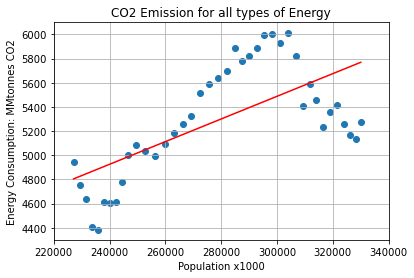

In [31]:
plt.scatter(all_energy_df.Population, all_energy_df.CO2_emission)
plt.grid(True)
plt.title('CO2 Emission for all types of Energy')
plt.xlabel('Population x1000')
plt.ylabel('Energy Consumption: MMtonnes CO2')
plt.xlim(220000, 340000)
plt.ylim(4300, 6100)

plt.plot(x_all, y_pred_all, color = 'red')

plt.show()

In [32]:
# Applying a rolling average for the 30 years of CO2 Emission we can see that the USA is on a rise of
# releasing CO2 emissions into the atmosphere.

Moving average change by year:  [4946.63, 4851.45, 4779.84, 4685.99, 4625.58, 4623.46, 4620.87, 4620.22, 4637.48, 4673.55, 4710.92, 4738.17, 4757.74, 4781.75, 4808.67, 4837.05, 4865.71, 4901.95, 4938.13, 4973.06, 5007.69, 5047.73, 5079.47, 5110.33, 5141.37, 5174.15, 5205.0, 5230.87, 5257.92, 5276.76, 5280.86, 5290.63, 5295.6, 5293.86, 5295.72, 5299.0, 5298.0, 5294.62, 5290.43, 5290.1]
Rolling average change: 4995.96


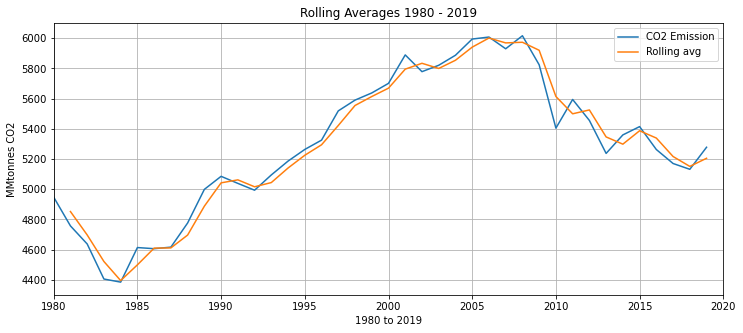

In [33]:
plt.figure( figsize = ( 12, 5))

sns.lineplot( x = 'Year',
             y = 'CO2_emission',
             data = all_energy_df,
             label = 'CO2 Emission')
  
sns.lineplot( x = 'Year',
             y = 'Change_CO2',
             data = all_energy_df,
             label = 'Rolling avg')

moving_averages = []
i = 1
cum_sum = np.cumsum(list(all_energy_df.CO2_emission));

while i <= 40:
    window_average = round(cum_sum[i-1] / i, 2)
    moving_averages.append(window_average)
    i += 1
    
print('Moving average change by year: ',moving_averages)
print('Rolling average change:',round(sum(moving_averages)/len(moving_averages), 2))
plt.title('Rolling Averages 1980 - 2019')
plt.xlabel('1980 to 2019')
plt.ylabel('MMtonnes CO2')
plt.xlim(1980, 2020)
plt.ylim(4300, 6100)
plt.grid(True)

plt.show()

In [34]:
# Looking at the average percent change by year for the USA we can see that the averages do not
# change to much, the USA looks like they are consistent on how much CO2 they release annually.

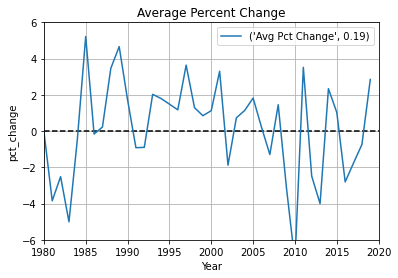

In [35]:
all_energy_df['pct_change'] = all_energy_df.CO2_emission.pct_change() * 100
all_energy_df.fillna(0,axis = 0, inplace = True)
all_energy_df.at[2184, 'pct_change'] = 0

sns.lineplot(x = 'Year',
             y = 'pct_change',
             data = all_energy_df,
             label = ('Avg Pct Change',round(all_energy_df["pct_change"].mean(), 2)))
plt.grid(True)
plt.title('Average Percent Change')
plt.xlim(1980, 2020)
plt.ylim(-6,6)
plt.hlines(0,xmin = 1980, xmax = 2020, colors = 'black', linestyles = 'dashed' )

plt.show()

<h3>2015 - 2019 CO2 Emissions</h3>

In [36]:
# Looking at the last 5 years of this Dataset we can see that the USA has increased its 
# Carbon Emissions, the slope of the entire dataset for CO2_Emissions is Slope: [0.00937716]
# While the slope for the last 5 years of this Dataset has rise to Slope: [0.01608321]
# It looks like there has been an increase in CO2_Emissions

In [37]:
last5_all_energy = all_energy_df.tail(6)

In [38]:
last5_all_energy.fillna(0,axis = 0, inplace = True)

x5_ec = np.array(last5_all_energy.Population).reshape((-1,1))
y5_ec = np.array(last5_all_energy.CO2_emission)

lr_model5 = LinearRegression().fit(x5_ec,y5_ec)
y_pred5 = lr_model5.predict(x5_ec)

r_squared5_ec = lr_model5.score(x5_ec,y5_ec)
print(f'Coeficient of Determination: {r_squared5_ec}',
      '\nY-Intercept:',lr_model5.intercept_,
     '\nSlope:',lr_model5.coef_)

Coeficient of Determination: 0.996087859825915 
Y-Intercept: 5.072515467646554 
Slope: [0.01608321]


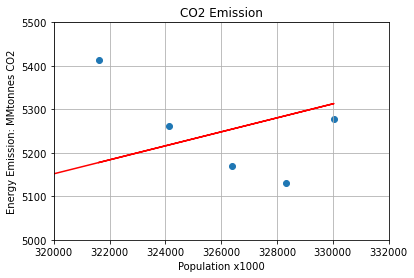

In [39]:
plt.scatter(last5_all_energy.Population, last5_all_energy.CO2_emission)
plt.grid(True)
plt.title('CO2 Emission')
plt.xlabel('Population x1000')
plt.ylabel('Energy Emission: MMtonnes CO2')
plt.xlim(320000, 332000)
plt.ylim(5000, 5500)

plt.plot(x5_ec, y_pred5, color = 'red')

plt.show()

In [40]:
# The plots below just show how much CO2 emission has been released from 1980 to 2019
# The second plot shows the last 5 years of the data and how the CO2 emissions began to increase,
# Nuclear energy use increases as well.

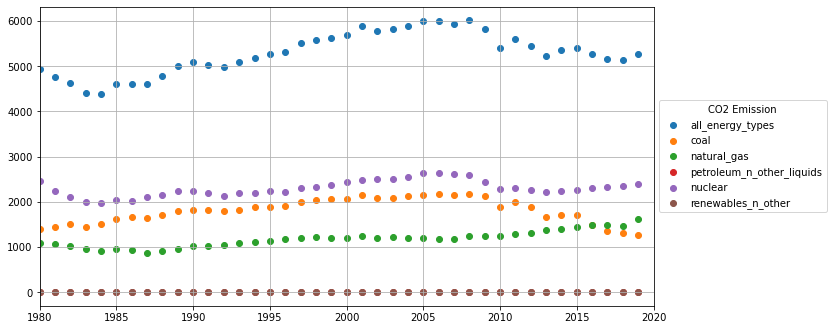

In [41]:
f, axes = plt.subplots(1,1, figsize = (11,5.5))

for a,(b,c) in enumerate(usa_df.groupby('Energy_type')):
    axes.scatter(c.Year, c.CO2_emission, label = b)
    
axes.legend(usa_df.Energy_type,
          title ="CO2 Emission",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
axes.grid(True)
plt.xlim(1980, 2020)
plt.show()

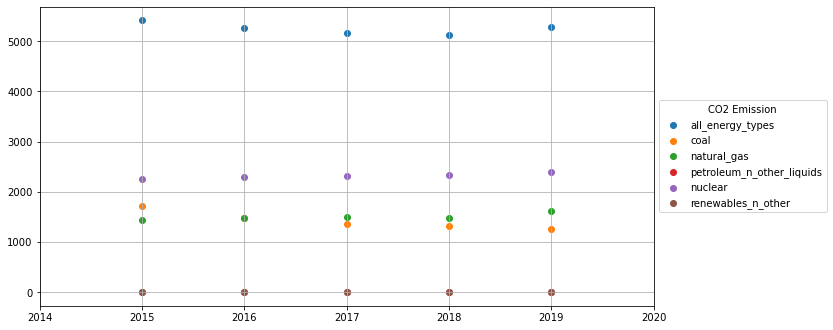

In [42]:
f, axes = plt.subplots(1,1, figsize = (11,5.5))
last5yrs = usa_df[usa_df.Year > 2014]

for a,(b,c) in enumerate(last5yrs.groupby('Energy_type')):
    axes.scatter(c.Year, c.CO2_emission, label = b)
    
axes.legend(last5yrs.Energy_type,
          title ="CO2 Emission",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
axes.grid(True)
plt.xlim(2014,2020)
plt.show()

<h2>Energy Consumption</h2>

In [43]:
# The energy Consumption shows how much of the Energy has been consumed by the USA as a whole
# and for the last 5 years of the Dataset.

In [44]:
all_energy_df.fillna(0,axis = 0, inplace = True)

x_ec = np.array(all_energy_df.Population).reshape((-1,1))
y_ec = np.array(all_energy_df.Energy_consumption)

lr_model_ec = LinearRegression().fit(x_ec,y_ec)
y_pred_ec = lr_model_ec.predict(x_ec)

r_squared_ec = lr_model_ec.score(x_ec,y_ec)
print(f'Coeficient of Determination: {r_squared_ec}',
      '\nY-Intercept:',lr_model_ec.intercept_,
     '\nSlope:',lr_model_ec.coef_)

Coeficient of Determination: 0.9309401589662261 
Y-Intercept: 7.3773899034938495 
Slope: [0.00029904]


In [45]:
X2_ec = sm.add_constant(x_ec)
est_ec = sm.OLS(y_ec, X2_ec)
est2_ec = est_ec.fit()
print(est2_ec.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     525.7
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           3.04e-24
Time:                        20:42:53   Log-Likelihood:                -118.52
No. Observations:                  41   AIC:                             241.0
Df Residuals:                      39   BIC:                             244.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3774      3.617      2.040      0.0

In [46]:
r_squared_ec = lr_model_ec.score(x_ec,y_ec)
print(f'Coeficient of Determination(R-Sqaured): {r_squared_ec}',
      '\nY-Intercept:',lr_model_ec.intercept_,
     '\nSlope:',lr_model_ec.coef_)

Coeficient of Determination(R-Sqaured): 0.9309401589662261 
Y-Intercept: 7.3773899034938495 
Slope: [0.00029904]


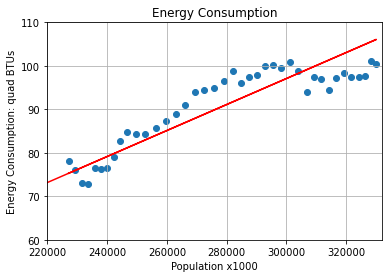

In [47]:
plt.scatter(all_energy_df.Population, all_energy_df.Energy_consumption)
plt.grid(True)
plt.title('Energy Consumption')
plt.xlabel('Population x1000')
plt.ylabel('Energy Consumption: quad BTUs')
plt.xlim(220000, 332000)
plt.ylim(60, 110)

plt.plot(x_ec, y_pred_ec, color = 'red')

plt.show()

Moving average change by year:  [78.02, 77.04, 75.71, 75.01, 75.32, 75.49, 75.65, 76.07, 76.8, 77.6, 78.22, 78.73, 79.27, 79.84, 80.45, 81.1, 81.86, 82.56, 83.21, 83.88, 84.58, 85.11, 85.65, 86.15, 86.71, 87.22, 87.67, 88.15, 88.51, 88.69, 88.98, 89.22, 89.38, 89.61, 89.86, 90.07, 90.26, 90.46, 90.73, 90.98]
Rolling average change: 83.5


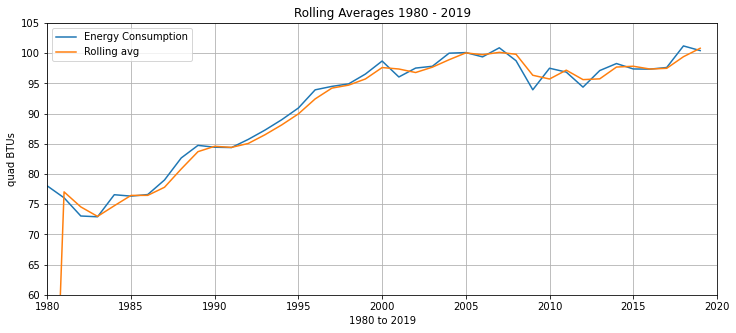

In [48]:
plt.figure( figsize = ( 12, 5))

sns.lineplot( x = 'Year',
             y = 'Energy_consumption',
             data = all_energy_df,
             label = 'Energy Consumption')
  
sns.lineplot( x = 'Year',
             y = 'Change',
             data = all_energy_df,
             label = 'Rolling avg')

moving_averages = []
i = 1
cum_sum = np.cumsum(list(all_energy_df.Energy_consumption));

while i <= 40:
    window_average = round(cum_sum[i-1] / i, 2)
    moving_averages.append(window_average)
    i += 1
    
print('Moving average change by year: ',moving_averages)
print('Rolling average change:',round(sum(moving_averages)/len(moving_averages), 2))
plt.title('Rolling Averages 1980 - 2019')
plt.xlabel('1980 to 2019')
plt.ylabel('quad BTUs')
plt.xlim(1980, 2020)
plt.ylim(60, 105)
plt.grid(True)

plt.show()

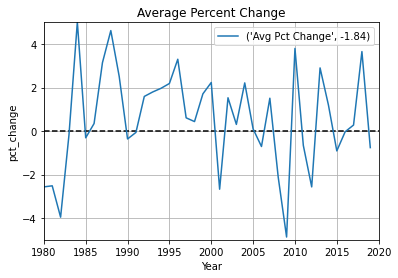

In [49]:
all_energy_df['pct_change'] = all_energy_df.Energy_consumption.pct_change() * 100
sns.lineplot(x = 'Year',
             y = 'pct_change',
             data = all_energy_df,
             label = ('Avg Pct Change',round(all_energy_df["pct_change"].mean(), 2)))
plt.grid(True)
plt.title('Average Percent Change')
plt.xlim(1980, 2020)
plt.ylim(-5,5)
plt.hlines(0,xmin = 1980, xmax = 2020, colors = 'black', linestyles = 'dashed' )

plt.show()

<h3>2015-2019</h3>

In [50]:
x5_ec = np.array(last5_all_energy.Population).reshape((-1,1))
y5_ec = np.array(last5_all_energy.Energy_consumption)

lr_model5 = LinearRegression().fit(x5_ec,y5_ec)
y_pred5 = lr_model5.predict(x5_ec)

r_squared5_ec = lr_model5.score(x5_ec,y5_ec)
print(f'Coeficient of Determination: {r_squared5_ec}',
      '\nY-Intercept:',lr_model5.intercept_,
     '\nSlope:',lr_model5.coef_)

Coeficient of Determination: 0.9993303578031298 
Y-Intercept: -0.021768151211119857 
Slope: [0.00030308]


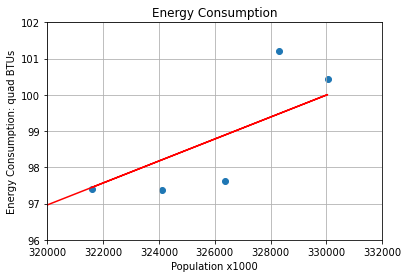

In [51]:
plt.scatter(last5_all_energy.Population, last5_all_energy.Energy_consumption)
plt.grid(True)
plt.title('Energy Consumption')
plt.xlabel('Population x1000')
plt.ylabel('Energy Consumption: quad BTUs')
plt.xlim(320000, 332000)
plt.ylim(96, 102)

plt.plot(x5_ec, y_pred5, color = 'red')

plt.show()